# SBU CSE 352 - HW 1 -  Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

---

All student names in group: Jerry Xiao   Dylan Lai[Add your name]

I understand that my submission needs to be my own group's work: JX DL








[all group member's initials]

I understand that ChatGPT / Copilot / other AI tools are not allowed: DL[all group member's initials]

## Instructions

Total Points: 100

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Only use standard packages (numpy, scipy, and built-in packages like random). Submit the completely rendered notebook as a HTML file.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [156]:
import numpy as np
import random

actions = ["north", "east", "west", "south", "suck"]
environment = []
def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [157]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [158]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [159]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: south
step 2 - action: east
step 3 - action: west
step 4 - action: east
step 5 - action: west
step 6 - action: north
step 7 - action: west
step 8 - action: north
step 9 - action: suck
step 10 - action: south
step 11 - action: east
step 12 - action: south
step 13 - action: east
step 14 - action: north
step 15 - action: north
step 16 - action: south
step 17 - action: south
step 18 - action: west
step 19 - action: north


1

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [246]:
# Your code and description goes here

def print_environment(environment):
    for row in environment:
        print(row)

def check_clean(environment,action,step,x,y,n,verbose):
    for i in range(n):
        for j in range(n):
            if environment[i][j]!="Clean":
                if verbose:
                    print("step", step+1 , "- action:", action)
                    print("current location row:",x,", column:",y)
                    print_environment(environment)
                return False
    return True
def check_dirty(environment,n):
    numDirty = 0
    for i in range(n):
        for j in range(n):
            if environment[i][j]=="Dirty":
                numDirty += 1
    return numDirty
def make_environment(n):
    environment = [["."]*n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            rand = random.random()
            if rand<0.2:
                environment[i][j]="Dirty"
            else:
                environment[i][j]="Clean"
    x = random.randint(0,n-1)
    y = random.randint(0,n-1)
    return (environment,x,y)
def simulation_environment(agent, environment, max_steps, x, y, n, verbose = True):
    for i in range(max_steps):
        if x==0:
            bumpers["north"]=True
        else:
            bumpers["north"]=False
        if x>=n-1:
            bumpers["south"]=True
        else:
            bumpers["south"]=False
        if y==0:
            bumpers["west"]=True
        else:
            bumpers["west"]=False
        if y==n-1:
            bumpers["east"]=True
        else:
            bumpers["east"]=False
        if environment[x][y]=="Dirty":
            dirty = True
        elif environment[x][y]=="Clean":
            dirty = False
        action = str(agent(bumpers,dirty))
        if action=="north":
            if bumpers["north"]!=True:
                x-=1
        elif action=="south":
            if bumpers["south"]!=True:
                x+=1
        elif action=="west":
            if bumpers["west"]!=True:
                y-=1
        elif action=="east":
            if bumpers["east"]!=True:
                y+=1
        else:
            environment[x][y]="Clean"
        is_clean = check_clean(environment,action,i,x,y,n, verbose)
        if is_clean:
            print("step", i+1 , "- action:", action)
            print("current location row:",x,", column:",y)
            if verbose:
                print_environment(environment)
            print("All Cleaned")
            return 0
    return check_dirty(environment,n)
                    
(environment,x,y) = make_environment(5)
numDirty = simulation_environment(simple_randomized_agent,environment,20,x,y,5)
print("Dirty spots: ", numDirty)

step 1 - action: north
current location row: 0 , column: 4
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
All Cleaned
Dirty spots:  0


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [53]:
# Your code and description goes here

def reflex_agent(bumpers,dirty):
    if dirty:
        return "suck"
    valid_actions =[]
    if not bumpers["west"]:
        valid_actions.append("west")
    if not bumpers["east"]:
        valid_actions.append("east")
    if not bumpers["north"]:
        valid_actions.append("north")
    if not bumpers["south"]:
        valid_actions.append("south")
    return np.random.choice(valid_actions)

(environment,x,y) = make_environment(5)
simulation_environment(reflex_agent,environment,20,x,y,5)

step 1 - action: south
current location  2   3
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Dirty', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
step 2 - action: north
current location  1   3
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Dirty', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
step 3 - action: south
current location  2   3
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Dirty', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
step 4 - action: east
current location  2   4
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Dirty', 'Clean', 'Clean', 'Cl

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [40]:
# Your short description of the state and your implementation goes here
# The agent state is described as its current location in the environment, and will have x and y variables to represent it.





In [181]:
# Your code goes here
class model_based_reflex_agent:
    def __init__(self,x,y,n):
        self.x = x
        self.y=y
        self.visited=[[False]*n for _ in range(n)]
        self.prev = "east"
    def action(self,bumpers,dirty):
        if dirty: 
            return "suck"
        if self.x == 0 and self.y == 0:
            self.visited[0][0] = True
            self.prev = "north"
        if not self.visited[0][0]:
            if not bumpers["west"]:
                coord = self.coords(self.x,self.y,"west")
                self.x = coord[0]
                self.y = coord[1]
                return "west"
            else :
                coord = self.coords(self.x,self.y,"north")
                self.x = coord[0]
                self.y = coord[1]
                return "north"
        self.visited[self.x][self.y] = True
        coord = self.coords(self.x,self.y,self.prev) #checking next
        if bumpers[self.prev] or self.visited[coord[0]][coord[1]]:
            if self.prev=="east":
                self.prev="south"
            elif self.prev=="south":
                self.prev="west"
            elif self.prev == "west":
                self.prev="north"
            elif self.prev == "north":
                self.prev="east"
        coord = self.coords(self.x,self.y,self.prev) #setting movement
        self.x = coord[0]
        self.y = coord[1]
        return self.prev
            
    def coords (self,x,y,action):
        if action=="north":
            return [x-1,y]
        elif action=="south":
            return [x+1,y]
        elif action=="east":
            return [x,y+1]
        elif action =="west":
            return [x,y-1]
        
        
(environment,x,y) = make_environment(5)
mbra = model_based_reflex_agent(x,y,5)
simulation_environment(mbra.action,environment,50,x,y,5)

step 1 - action: west
current location row: 1 , column: 3
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Dirty', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Dirty', 'Clean', 'Clean', 'Clean']
step 2 - action: west
current location row: 1 , column: 2
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Dirty', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Dirty', 'Clean', 'Clean', 'Clean']
step 3 - action: west
current location row: 1 , column: 1
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Dirty', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Dirty', 'Clean', 'Clean', 'Clean']
step 4 - action: west
current location row: 1 , column: 0
['Clean', 'Clean', 'Clean', 'Clean', 'Clean']
['Clean', 'Clean', 'Clean', 'Cle

[['Clean', 'Clean', 'Clean', 'Clean', 'Clean'],
 ['Clean', 'Clean', 'Clean', 'Clean', 'Clean'],
 ['Clean', 'Clean', 'Clean', 'Clean', 'Clean'],
 ['Clean', 'Clean', 'Clean', 'Clean', 'Clean'],
 ['Clean', 'Clean', 'Clean', 'Clean', 'Clean']]

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [287]:
# Your code goes here
from copy import deepcopy
(environment,x,y) = make_environment(5)
randenv = deepcopy(environment)
refenv = deepcopy(environment)
modenv = deepcopy(environment)
print("randomized")
env = simulation_environment(simple_randomized_agent,randenv,100,x,y,5,verbose=False)
print("end result: ", env)
#(environment,x,y) = make_environment(5)
print("\nreflex")
env = simulation_environment(reflex_agent,refenv,100,x,y,5,verbose=False)
print("end result: ", env)
print("\nmodel based reflex")
#(environment,x,y) = make_environment(5)
mbra = model_based_reflex_agent(x,y,5)
env = simulation_environment(mbra.action,modenv,100,x,y,5,verbose=False)
print("end result: ", env)
#print_environment(env)

randomized
end result:  2

reflex
step 83 - action: suck
current location row: 0 , column: 2
All Cleaned
end result:  0

model based reflex
step 17 - action: suck
current location row: 4 , column: 4
All Cleaned
end result:  0


In [288]:
# Your code goes here
(environment,x,y) = make_environment(10)
randenv = deepcopy(environment)
refenv = deepcopy(environment)
modenv = deepcopy(environment)
print("randomized")
env = simulation_environment(simple_randomized_agent,randenv,100,x,y,10,verbose=False)
print("end result: ", env)
#(environment,x,y) = make_environment(10)
print("\nreflex")
env = simulation_environment(reflex_agent,refenv,100,x,y,10,verbose=False)
print("end result: ", env)
print("\nmodel based reflex")
#(environment,x,y) = make_environment(10)
mbra = model_based_reflex_agent(x,y,10)
env = simulation_environment(mbra.action,modenv,100,x,y,10,verbose=False)
print("end result: ", env)

randomized
end result:  16

reflex
end result:  10

model based reflex
end result:  5


In [283]:
# Your code goes here
(environment,x,y) = make_environment(100)
randenv = deepcopy(environment)
refenv = deepcopy(environment)
modenv = deepcopy(environment)
print("randomized")
env = simulation_environment(simple_randomized_agent,randenv,100,x,y,100,verbose=False)
print("dirty spots: ", env)
#(environment,x,y) = make_environment(100)
print("\nreflex")
env = simulation_environment(reflex_agent,refenv,100,x,y,100,verbose=False)
print("dirty spots: ", env)
print("\nmodel based reflex")
#(environment,x,y) = make_environment(100)
mbra = model_based_reflex_agent(x,y,100)
env = simulation_environment(mbra.action,modenv,100,x,y,100,verbose=False)
print("dirty spots: ", env)

randomized
dirty spots:  2007

reflex
dirty spots:  2005

model based reflex
dirty spots:  1997


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |-102 |-83 | -17|
| 10x10   |-116 |-110 | -105|
| 100x100 |-2107 |-2105 |-2097 |

Add charts to compare the performance of the different agents.

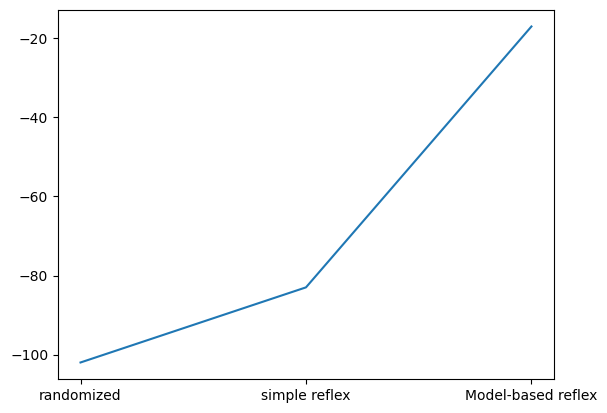

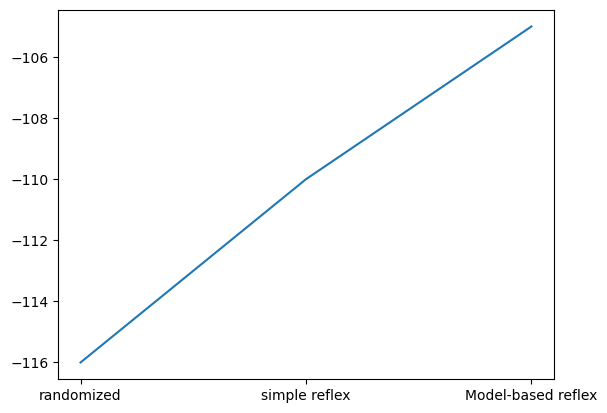

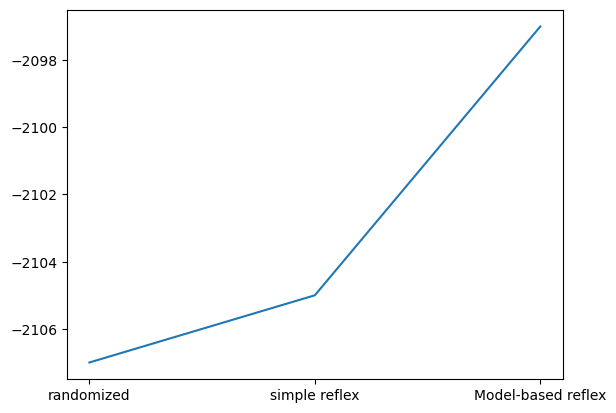

In [292]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt
xpoints = np.array(['randomized', 'simple reflex', 'Model-based reflex'])
ypoints = np.array([-102,-83,-17])
plt.plot(xpoints, ypoints)
plt.show()
xpoints = np.array(['randomized', 'simple reflex', 'Model-based reflex'])
ypoints = np.array([-116,-110,-105])
plt.plot(xpoints, ypoints)
plt.show()
xpoints = np.array(['randomized', 'simple reflex', 'Model-based reflex'])
ypoints = np.array([-2107,-2105,-2097])
plt.plot(xpoints, ypoints)
plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [298]:
# Answer goes here
'''The model based reflex agent does not work properly if the room has an irregular shape, or obstacles.
It works by assuming the shape of the area is a rectangle and that the only things stopping the vacuum are the walls.
If it hits an obstacle it may miss sections of the area, if the shape is irregular it will also miss sections of the area.
The model does not require size to function properly.
The simple reflex agent is not affected by the size, shape, or obstacle'''

'The model based reflex agent does not work properly if the room has an irregular shape, or obstacles.\nIt works by assuming the shape of the area is a rectangle\nThe simple reflex agent is not affected by the siz'



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
